<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap12/12_1_Self_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 12.1: Self Attention**

This notebook builds a self-attention mechanism from scratch, as discussed in section 12.2 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.



In [13]:
import numpy as np
import matplotlib.pyplot as plt

The self-attention mechanism maps $N$ inputs $\mathbf{x}_{n}\in\mathbb{R}^{D}$ and returns $N$ outputs $\mathbf{x}'_{n}\in \mathbb{R}^{D}$. 
  
In the picture: $\mathbf{x}' == sa$ 


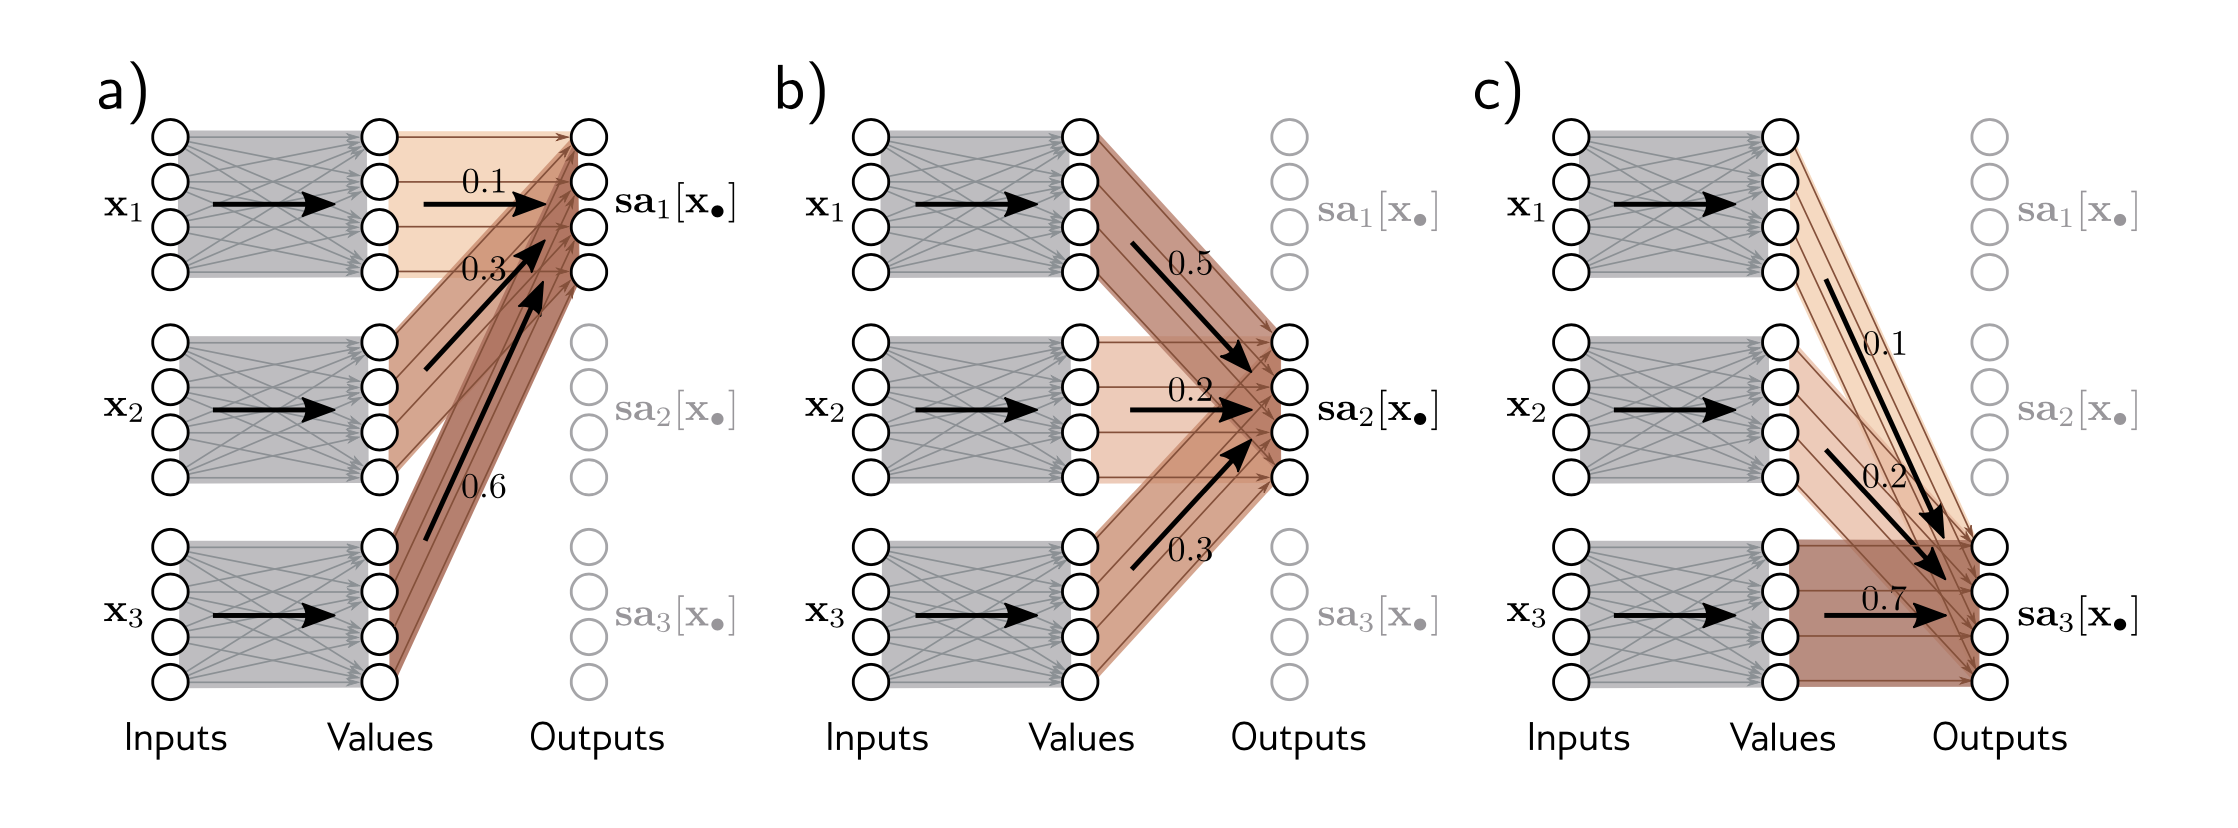



In [14]:
# Set seed so we get the same random numbers
np.random.seed(3)
# Number of inputs
N = 3
# Number of dimensions of each input
D = 4
# Create an empty list
all_x = []
# Create elements x_n and append to list
for n in range(N):
  all_x.append(np.random.normal(size=(D,1)))

print(all_x)

[array([[ 1.78862847],
       [ 0.43650985],
       [ 0.09649747],
       [-1.8634927 ]]), array([[-0.2773882 ],
       [-0.35475898],
       [-0.08274148],
       [-0.62700068]]), array([[-0.04381817],
       [-0.47721803],
       [-1.31386475],
       [ 0.88462238]])]


We'll also need the weights and biases for the keys, queries, and values (equations 12.2 and 12.4)

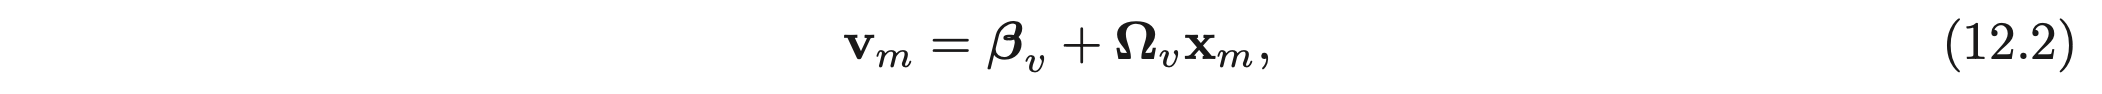


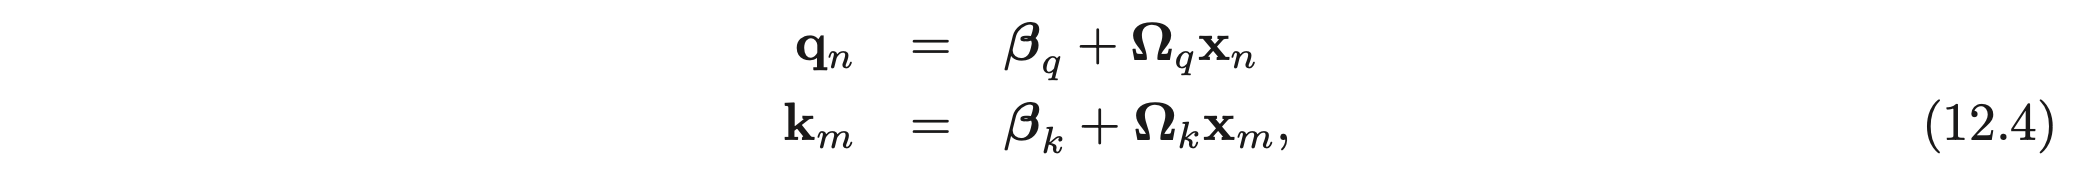

In [15]:
# Set seed so we get the same random numbers
np.random.seed(0)

# Choose random values for the parameters
omega_q = np.random.normal(size=(D,D))
omega_k = np.random.normal(size=(D,D))
omega_v = np.random.normal(size=(D,D))
beta_q = np.random.normal(size=(D,1))
beta_k = np.random.normal(size=(D,1))
beta_v = np.random.normal(size=(D,1))

Now let's compute the queries, keys, and values for each input

In [16]:
# Make three lists to store queries, keys, and values
all_queries = []
all_keys = []
all_values = []

# For every input
for x in all_x:
  # TODO -- compute the keys, queries and values.
  # Replace these three lines
  query = beta_q + np.matmul(omega_q,x)
  key = beta_k + np.matmul(omega_k,x)
  value = beta_v + np.matmul(omega_v,x)

  all_queries.append(query)
  all_keys.append(key)
  all_values.append(value)   

We'll need a softmax function (equation 12.5) -- here, it will take a list of arbitrary numbers and return a list where the elements are non-negative and sum to one


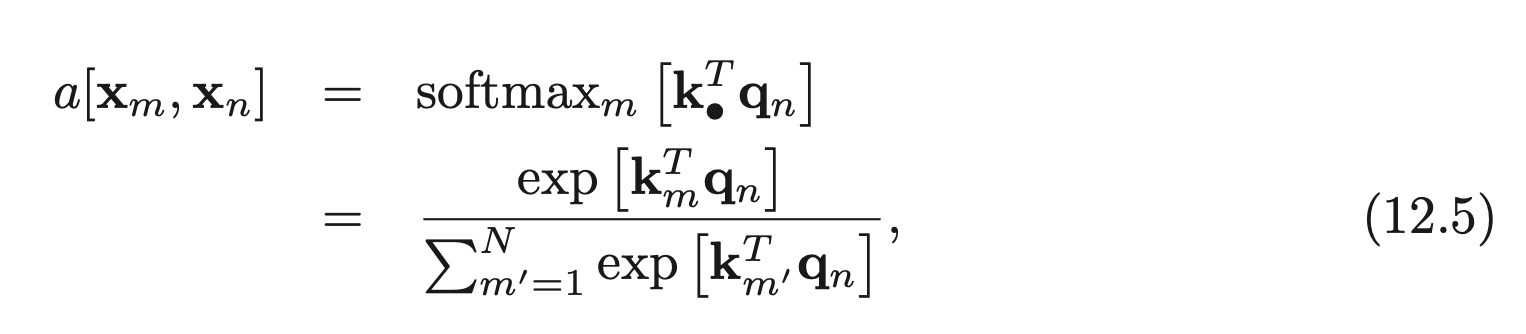

In [17]:
def softmax(items_in):
    # TODO Compute the elements of items_out
  # Replace this line
  items_out = items_in.copy()

  #BEGIN_ANSWER
  items_out = []
  denom = 0
  for item in items_in:
    denom  = denom + np.exp(item)
  for item in items_in:
    items_out.append(np.exp(item)/denom)
  # END_ANSWER

  return items_out ;

Now compute the self attention values:

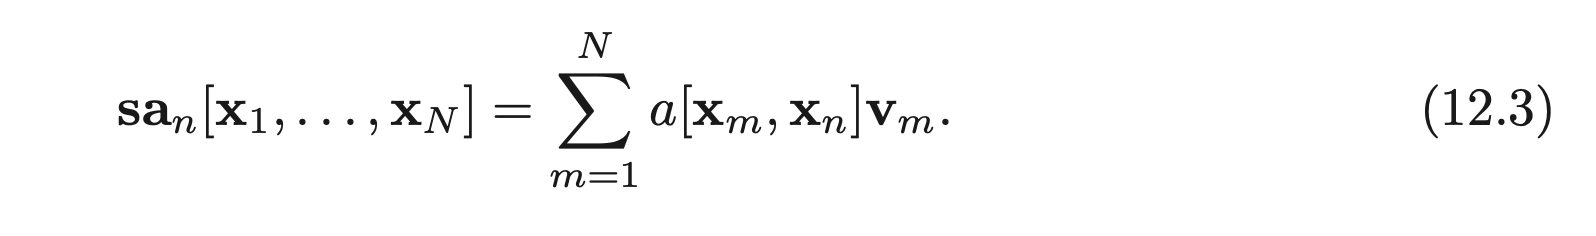

In [18]:
# Create emptymlist for output
all_x_prime = []

# For each output
for n in range(N):
    
  # Create list for dot products of query N with all keys
  all_km_qn = []
    
  # Compute the dot products
  for key in all_keys:
    
    # TODO -- compute the appropriate dot product --- ESTA CORRETA A LINHA ABAIXO???
    # Replace this line
    dot_product = np.matmul(all_queries[n].T,key)
    
    # Store dot product
    all_km_qn.append(dot_product[0]) 

  # Compute softmax
  attention = softmax(all_km_qn)
    
  # Print result (should be positive sum to one)
  #print("Attentions for output ", n)
  #print(attention)
  #print("sum==",np.sum(attention))
    

  # TODO: Compute a weighted sum of all of the values according to the attention
  # (equation 12.3)
  # Replace this line
  x_prime = np.zeros((D,1))
  #BEGIN_ANSWER
  for m in range(N):
      x_prime = x_prime+ attention[m] * all_values[m]
  #END_ANSWER
  all_x_prime.append(x_prime)


# Print out true values to check you have it correct
print("\n")
print("x_prime_0_calculated:", all_x_prime[0].transpose())
print("x_prime_0_true      : [[ 0.94744244 -0.24348429 -0.91310441 -0.44522983]]")
print("x_prime_1_calculated:", all_x_prime[1].transpose())
print("x_prime_1_true      : [[ 1.64201168 -0.08470004  4.02764044  2.18690791]]")
print("x_prime_2_calculated:", all_x_prime[2].transpose())#
print("x_prime_2_true      : [[ 1.61949281 -0.06641533  3.96863308  2.15858316]]")




x_prime_0_calculated: [[ 0.94744244 -0.24348429 -0.91310441 -0.44522983]]
x_prime_0_true      : [[ 0.94744244 -0.24348429 -0.91310441 -0.44522983]]
x_prime_1_calculated: [[ 1.64201168 -0.08470004  4.02764044  2.18690791]]
x_prime_1_true      : [[ 1.64201168 -0.08470004  4.02764044  2.18690791]]
x_prime_2_calculated: [[ 1.61949281 -0.06641533  3.96863308  2.15858316]]
x_prime_2_true      : [[ 1.61949281 -0.06641533  3.96863308  2.15858316]]


Now let's compute the same thing, but using matrix calculations.  We'll store the $N$ inputs $\mathbf{x}_{n}\in\mathbb{R}^{D}$ in the columns of a $D\times N$ matrix, using equations 12.6 and 12.7/8.

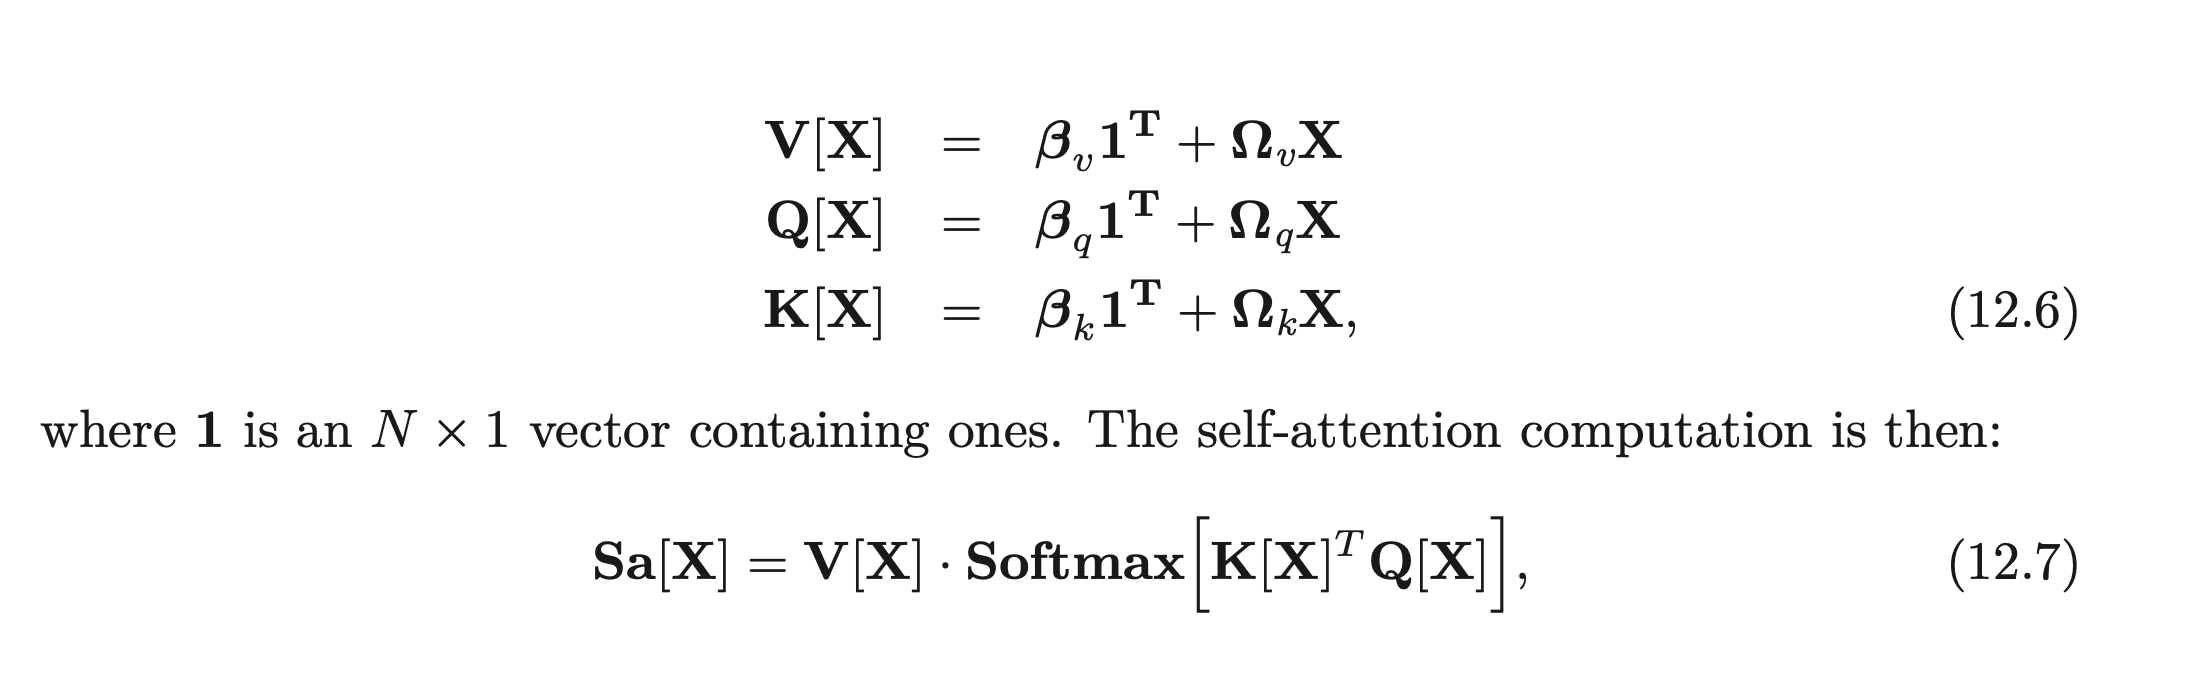

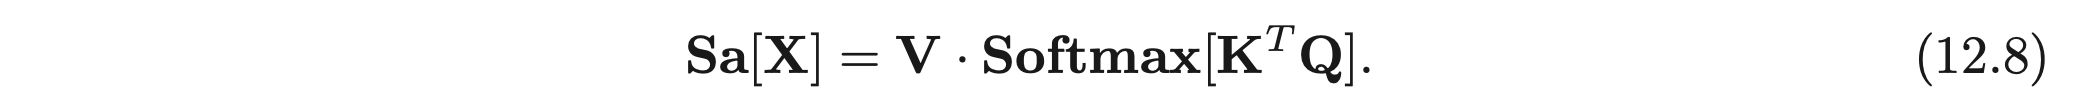

Note:  The book uses column vectors (for compatibility with the rest of the text), but in the wider literature it is more normal to store the inputs in the rows of a matrix;  in this case, the computation is the same, but all the matrices are transposed and the operations proceed in the reverse order.

In [19]:
# Define softmax operation that works independently on each column
def softmax_cols(data_in):
  # Exponentiate all of the values
  exp_values = np.exp(data_in) ;
  # Sum over columns
  denom = np.sum(exp_values, axis = 0);
  # Replicate denominator to N rows
  denom = np.matmul(np.ones((data_in.shape[0],1)), denom[np.newaxis,:])
  # Compute softmax
  softmax = exp_values / denom
  # return the answer
  return softmax

In [23]:
# Now let's compute self attention in matrix form
def self_attention(X,omega_v, omega_q, omega_k, beta_v, beta_q, beta_k):
    
    X_prime = np.zeros_like(X);
    
    N = X.shape[1]
    vet1T = np.ones((N, 1)).T
    
    # 1. Compute queries, keys, and values
    V = np.matmul(beta_v, vet1T) + np.matmul(omega_v, X)
    Q = np.matmul(beta_q, vet1T) + np.matmul(omega_q, X)
    K = np.matmul(beta_k, vet1T) + np.matmul(omega_k, X)
    
    # 2. Compute dot products
    dot_product = np.dot(K.T,Q)
    
    # 3. Apply softmax to calculate attentions
    smax = softmax_cols(dot_product)
    print("attentions=",smax)
    
    # 4. Weight values by attentions
    X_prime = np.matmul(V, smax)
    
    return X_prime

In [24]:
# Copy data into matrix
X = np.zeros((D, N))
X[:,0] = np.squeeze(all_x[0])
X[:,1] = np.squeeze(all_x[1])
X[:,2] = np.squeeze(all_x[2])

print(X)

[[ 1.78862847 -0.2773882  -0.04381817]
 [ 0.43650985 -0.35475898 -0.47721803]
 [ 0.09649747 -0.08274148 -1.31386475]
 [-1.8634927  -0.62700068  0.88462238]]


In [25]:
# Run the self attention mechanism
X_prime = self_attention(X,omega_v, omega_q, omega_k, beta_v, beta_q, beta_k)

# Print out the results
print("\nX_prime=",X_prime)

attentions= [[1.24326146e-13 2.79525306e-12 5.05707907e-03]
 [9.98281489e-01 5.85506360e-03 6.54776072e-03]
 [1.71851130e-03 9.94144936e-01 9.88395160e-01]]

X_prime= [[ 0.94744244  1.64201168  1.61949281]
 [-0.24348429 -0.08470004 -0.06641533]
 [-0.91310441  4.02764044  3.96863308]
 [-0.44522983  2.18690791  2.15858316]]


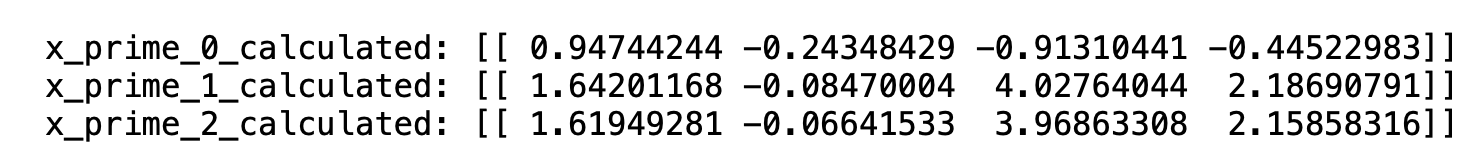

If you did this correctly, the values should be the same as above.

TODO:  

Print out the attention matrix -- DONE ABOVE.  
You will see that the values are quite extreme (one is very close to one and the others are very close to zero.  Now we'll fix this problem by using scaled dot-product attention.

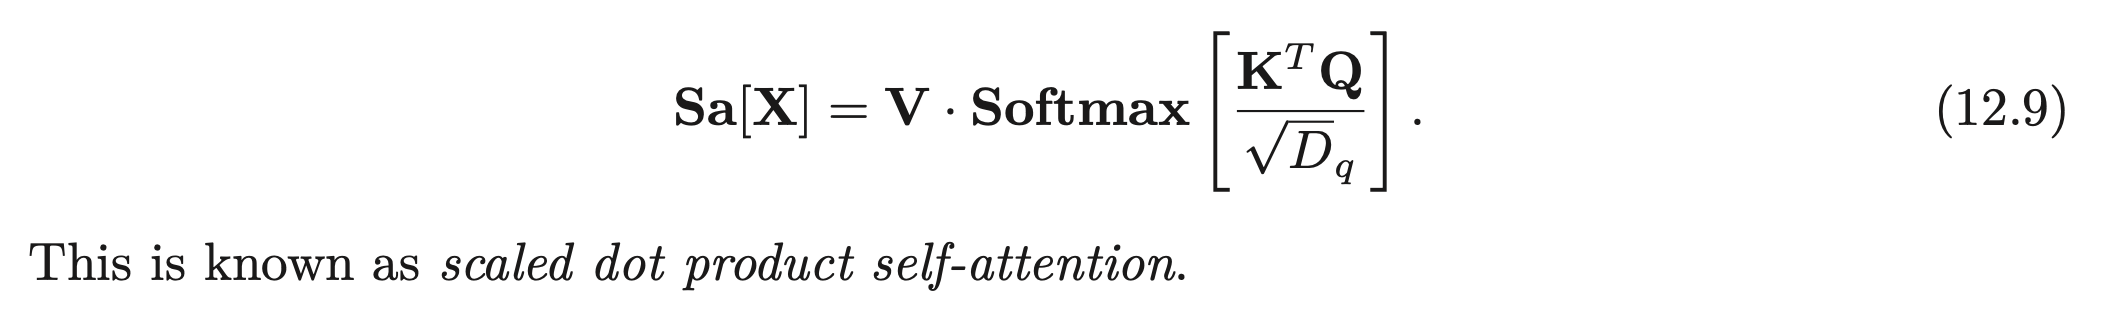

In [26]:
# Now let's compute self attention in matrix form
def scaled_dot_product_self_attention(X,omega_v, omega_q, omega_k, beta_v, beta_q, beta_k):

    # TODO -- Write this function
    N = X.shape[1]
    vet1T = np.ones((N, 1)).T
    
    # 1. Compute queries, keys, and values
    V = np.matmul(beta_v, vet1T) + np.matmul(omega_v, X)
    Q = np.matmul(beta_q, vet1T) + np.matmul(omega_q, X)
    K = np.matmul(beta_k, vet1T) + np.matmul(omega_k, X)
    
    # 2. Compute dot products
    dot_product = np.dot(K.T,Q)

    # 3. Scale the dot products as in equation 12.9
    D_q = X.shape[0] #the number of rows in omega_q and omega_k, which must be the same
    dot_product = dot_product / (np.sqrt(D_q))

    # 4. Apply softmax to calculate attentions
    smax = softmax_cols(dot_product)
    print("attentions=",smax)
    
    # 5. Weight values by attentions
    X_prime = np.matmul(V, smax)

    return X_prime

In [27]:
# Run the self attention mechanism
X_prime = scaled_dot_product_self_attention(X,omega_v, omega_q, omega_k, beta_v, beta_q, beta_k)

# Print out the results
print("\nX_prime=",X_prime)

attentions= [[3.38843552e-07 1.55730194e-06 6.20418746e-02]
 [9.60161968e-01 7.12734969e-02 7.05962187e-02]
 [3.98376935e-02 9.28724946e-01 8.67361907e-01]]

X_prime= [[ 0.97411966  1.59622051  1.32638014]
 [-0.23738409 -0.09516106  0.13062402]
 [-0.72333202  3.70194096  3.02371664]
 [-0.34413007  2.01339538  1.6902419 ]]


TODO -- Investigate whether the self-attention mechanism is covariant with respect to permutation.
If it is, when we permute the columns of the input matrix $\mathbf{X}$, the columns of the output matrix $\mathbf{X}'$ will also be permuted.


In [31]:
def permute_columns(M,col1,col2):
    
    for lin in range(M.shape[0]):
        first = M[lin,col1]
        M[lin,col1] = M[lin,col2] 
        M[lin,col2] = first
    
    return(M)

In [32]:
def scaled_dot_product_self_attention_permutation(X,omega_v, omega_q, omega_k, beta_v, beta_q, beta_k):

    # TODO -- Write this function
    
    # permute columns 0 and 1 of input X
    print("input X =\n",X)
    
    X = permute_columns(X,0,1)
    
    print("input X after permute =\n",X)
    
    N = X.shape[1]
    vet1T = np.ones((N, 1)).T
    
    # 1. Compute queries, keys, and values
    V = np.matmul(beta_v, vet1T) + np.matmul(omega_v, X)
    Q = np.matmul(beta_q, vet1T) + np.matmul(omega_q, X)
    K = np.matmul(beta_k, vet1T) + np.matmul(omega_k, X)
    
    # 2. Compute dot products
    dot_product = np.dot(K.T,Q)

    # 3. Scale the dot products as in equation 12.9
    D_q = X.shape[0] #the number of rows in omega_q and omega_k, which must be the same
    dot_product = dot_product / (np.sqrt(D_q))

    # 4. Apply softmax to calculate attentions
    smax = softmax_cols(dot_product)
    print("attentions=",smax)
    
    # 5. Weight values by attentions
    X_prime = np.matmul(V, smax)

    return X_prime

In [33]:
# Copy data into matrix
X = np.zeros((D, N))
X[:,0] = np.squeeze(all_x[0])
X[:,1] = np.squeeze(all_x[1])
X[:,2] = np.squeeze(all_x[2])

In [34]:
# Run the self attention mechanism
X_prime = scaled_dot_product_self_attention_permutation(X,omega_v, omega_q, omega_k, beta_v, beta_q, beta_k)

# Print out the results
print("\nX_prime=",X_prime)

input X =
 [[ 1.78862847 -0.2773882  -0.04381817]
 [ 0.43650985 -0.35475898 -0.47721803]
 [ 0.09649747 -0.08274148 -1.31386475]
 [-1.8634927  -0.62700068  0.88462238]]
input X after permute =
 [[-0.2773882   1.78862847 -0.04381817]
 [-0.35475898  0.43650985 -0.47721803]
 [-0.08274148  0.09649747 -1.31386475]
 [-0.62700068 -1.8634927   0.88462238]]
attentions= [[7.12734969e-02 9.60161968e-01 7.05962187e-02]
 [1.55730194e-06 3.38843552e-07 6.20418746e-02]
 [9.28724946e-01 3.98376935e-02 8.67361907e-01]]

X_prime= [[ 1.59622051  0.97411966  1.32638014]
 [-0.09516106 -0.23738409  0.13062402]
 [ 3.70194096 -0.72333202  3.02371664]
 [ 2.01339538 -0.34413007  1.6902419 ]]


X_prime original =   
  
  ![image.png](attachment:image.png)  
    
    The self-attention mechanism is covariant with respect to permutation !!